# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.209483e+01     1.693345e+01
 * time: 0.003222942352294922
     1     6.286831e+01     1.134613e+01
 * time: 0.009351968765258789
     2     5.624295e+01     1.598555e+01
 * time: 0.022549867630004883
     3     4.266253e+01     1.113962e+01
 * time: 0.04113483428955078
     4     3.542143e+01     1.081219e+01
 * time: 0.05989694595336914
     5     1.522505e+01     2.954300e+00
 * time: 0.0786588191986084
     6     1.273767e+01     3.787509e+00
 * time: 0.14101195335388184
     7     1.034875e+01     2.592299e+00
 * time: 0.15454792976379395
     8     9.040954e+00     4.116953e+00
 * time: 0.1653578281402588
     9     8.200656e+00     2.655012e+00
 * time: 0.178696870803833
    10     7.532824e+00     2.653283e+00
 * time: 0.19208693504333496
    11     6.914551e+00     1.805517e+00
 * time: 0.205427885055542
    12     6.868755e+00     3.450654e+00
 * time: 0.21621179580688477
    13     6.591945e+00     2.162202e+00
 * time: 0.

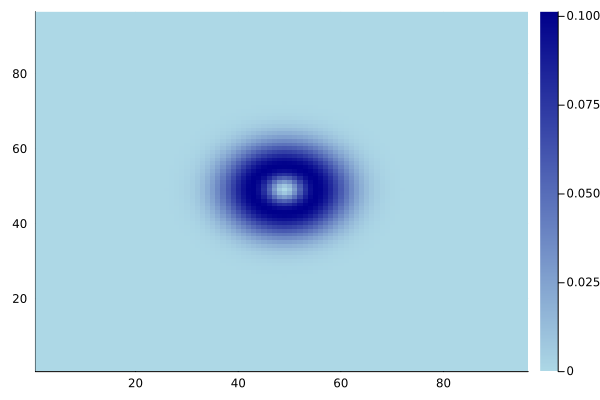

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)